# Connecting to CUDA Grünau

Unfortunately, I tried out Google Colab, but it did not work out.
Even after fixing all not working things (that work everywhere else except colab), its capacity is too limited and they actually do not write after how many hours they interrupt process ("because everytime it is different").

So, if you are not going to use CUDA Grünau, skip this part.

If you are interested, which code is working in Colab, it is in Appendix. It runs only on small datasets (that processes are not interrupted).

In [1]:
# For gruenau: For CUDA making it available this works:
# pip3 install torch torchvision torchaudio

import torch

if torch.cuda.is_available():
    print("CUDA is available!")
else:
    print("CUDA is not available.")

CUDA is available!


In [2]:
# Check the number of available GPUs
num_gpus = torch.cuda.device_count()
print("Number of available GPUs:", num_gpus)

Number of available GPUs: 3


In [3]:
torch.cuda.get_device_name(2)

'NVIDIA A100 80GB PCIe'

In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Nov__3_17:16:49_PDT_2023
Cuda compilation tools, release 12.3, V12.3.103
Build cuda_12.3.r12.3/compiler.33492891_0


In [5]:
# Index of the GPU you want to use (e.g., 0, 1, 2, etc.)
# Choose that one that is not used by other processes
gpu_index = "1"

# 1. Prepare datasets

In [6]:
import pandas as pd
import numpy as np
import os

In [8]:
# Create a folder named "datasets" if it doesn't exist
folder_name = "datasets"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

df = pd.read_csv("./datasets/top_5_countries.csv", index_col=0, parse_dates=True)
# Reset index for Data Loader
df.reset_index(inplace=True)
df = df.iloc[:,:-6]

In [3]:
top_5_countries = ['DE', 'GB', 'ES', 'FR', 'IT']

# Split and save the datasets
for country_prefix in top_5_countries:
    # Filter columns with the specified prefix
    country_columns = [col for col in df.columns if col.startswith(country_prefix)]
    
    # Insert the date column at the beginning of every dataset
    country_columns.insert(0,"date")
    country_df = df[country_columns]
    
    # Save the DataFrame to a CSV file
    file_name = f"./datasets/{country_prefix}_data.csv"
    country_df.to_csv(file_name, index=False)


# Distribution

In [6]:
train=28321
val=6577
test=8713

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
def split_scale_dataset(data, train_size, val_size, test_size=None):

    """
    data (pd.DataFrame): Dataframe with time series data.
    train_size, test_size, val_size (int): number of days in train, 
                                            test and validation datasets.

    return: Scaled datasets
   
    
    num_train = train_size*24
    if test_size is not None:
        num_test = test_size*24
    num_vali = val_size*24
"""
    num_train = train_size
    num_vali = val_size
    train_data = data.iloc[:num_train] # 0, a-1
    vali_data = data.iloc[num_train: num_train + num_vali] # a, a+b-1
    test_data = data.iloc[num_train + num_vali:] # a+b

    assert(len(data) == len(train_data) + len(test_data) + len(vali_data))

    print(f'{len(train_data)} observations in the train dataset.\n {len(test_data)} observations in the test dataset.\n {len(vali_data)} observations in the validation dataset.')

    # initialize scaler object
    scaler = StandardScaler()

    # scale data
    train_data_sc = scaler.fit_transform(train_data)
    vali_data_sc = scaler.transform(vali_data)
    test_data_sc = scaler.transform(test_data)

    train_data_sc = pd.DataFrame(train_data_sc, columns=train_data.columns, index=train_data.index)
    vali_data_sc = pd.DataFrame(vali_data_sc, columns=vali_data.columns, index=vali_data.index)
    test_data_sc = pd.DataFrame(test_data_sc, columns=test_data.columns, index=test_data.index)

    return train_data_sc, vali_data_sc, test_data_sc

#time_series = pd.read_csv("./datasets/df_most_important_columns.csv", index_col=0, parse_dates=True)
#train, vali, test = split_scale_dataset(data=time_series, train_size=train, val_size=val)

<Axes: xlabel='DE_load_actual_entsoe_transparency', ylabel='Count'>

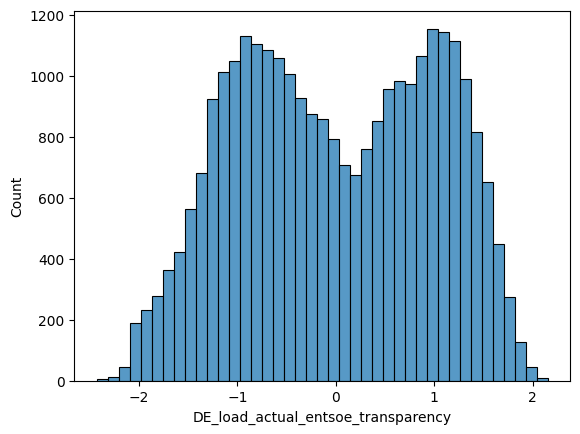

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train["DE_load_actual_entsoe_transparency"])

In [15]:
train.describe().round(2)

,DE_load_actual_entsoe_transparency,DE_solar_generation_actual,DE_wind_generation_actual
count,28321.00,28321.00,28321.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.43,-0.64,-1.24
25%,-0.84,-0.64,-0.77
50%,-0.03,-0.63,-0.29
75%,0.89,0.37,0.52
max,2.16,3.94,3.99


<Axes: xlabel='DE_load_actual_entsoe_transparency', ylabel='Count'>

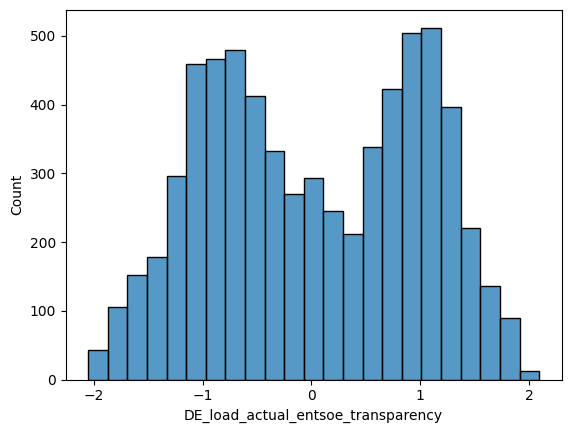

In [9]:
sns.histplot(vali["DE_load_actual_entsoe_transparency"])

In [16]:
vali.describe().round(2)

,DE_load_actual_entsoe_transparency,DE_solar_generation_actual,DE_wind_generation_actual
count,6577.00,6577.00,6577.00
mean,0.03,0.27,0.14
std,0.97,1.29,1.03
min,-2.05,-0.64,-1.21
25%,-0.82,-0.64,-0.64
50%,-0.01,-0.56,-0.14
75%,0.91,1.05,0.65
max,2.09,4.16,4.24


<Axes: xlabel='DE_load_actual_entsoe_transparency', ylabel='Count'>

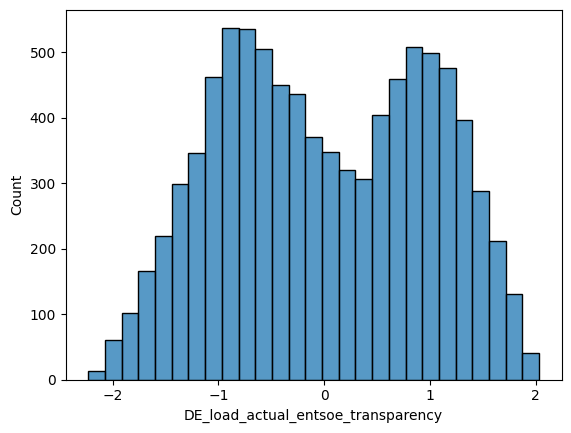

In [10]:
sns.histplot(test["DE_load_actual_entsoe_transparency"])

In [17]:
test.describe().round(2)

,DE_load_actual_entsoe_transparency,DE_solar_generation_actual,DE_wind_generation_actual
count,8895.00,8895.00,8895.00
mean,0.01,0.14,0.49
std,0.98,1.20,1.22
min,-2.23,-0.64,-1.20
25%,-0.81,-0.64,-0.46
50%,-0.05,-0.62,0.18
75%,0.87,0.59,1.14
max,2.03,4.34,4.30


# Distribution ETTH1

In [6]:
import pandas as pd
time_series = pd.read_csv("./datasets/ETTh1.csv", index_col=0, parse_dates=True)
train, vali, test = split_scale_dataset(data=time_series, train_size=8521, val_size=2857)

8521 observations in the train dataset.
 6042 observations in the test dataset.
 2857 observations in the validation dataset.


In [24]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17420 entries, 2016-07-01 00:00:00 to 2018-06-26 19:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HUFL    17420 non-null  float64
 1   HULL    17420 non-null  float64
 2   MUFL    17420 non-null  float64
 3   MULL    17420 non-null  float64
 4   LUFL    17420 non-null  float64
 5   LULL    17420 non-null  float64
 6   OT      17420 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
17420

In [25]:
8521 + 2857 + 2857

14235

In [33]:
import os
current_path = os.getcwd() + "/datasets/"
dataset = 'ETTh1.csv'

!python -u ./TSLibrary/run.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path $current_path \
  --data_path $dataset \
  --model_id 1 \
  --model "Informer" \
  --data custom \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 7 \
  --dec_in 7 \
  --c_out 7 \
  --des 'Exp' \
  --itr 2

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 8569
val 4345
test 4321
	iters: 100, epoch: 1 | loss: 0.4733695
	speed: 0.0626s/iter; left time: 160.8995s
	iters: 200, epoch: 1 | loss: 0.3275512
	speed: 0.0413s/iter; left time: 102.0419s
Epoch: 1 running time: 0.20149732033411663 min.
Epoch: 1, Steps: 267 | Train Loss: 0.4435941 Vali Loss: 0.6720330 Test Loss: 0.7471600
Validation loss decreased (inf --> 0.672033).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.3207772
	speed: 0.1169s/iter; left time: 269.3744s
	iters: 200, epoch: 2 | loss: 0.3147012
	speed: 0.0416s/iter; left time: 91.7787s
Epoch: 2 running time: 0.18970996936162313 min.
Epoch: 2, Steps: 267 | Train Loss: 0.3283183 Vali Loss: 0.6654594 Test Loss: 0.8112167
Validation loss decreased (0.672033 --> 0.665459).  Saving model ...
Updating learning rate to 5e-05

# 2. Informer

In [13]:
"""
# https://colab.research.google.com/drive/1rv2rKwQqgoHDNjXtRoAEWZ2ATz0gGAKu?usp=sharing#scrollTo=yu6zzic9t_Cz
# Popen: https://colab.research.google.com/github/aviadr1/learn-python/blob/master/content/13_multiprocessing/notebooks/os_system_subprocess.ipynb
import subprocess
import os
# parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_run_file = "./TSLibrary/run.py"

def run_output(path_to_run_file, model_arguments):
    try:
        # Execute the script and capture the output
        command = ["python", "-u", path_to_run_file] + model_arguments
        output = subprocess.check_output(command, universal_newlines=True)
    except subprocess.CalledProcessError as e:
        output = e.output  

    return output
"""

In [ ]:
"""
import subprocess
import os
# parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_run_file = "/content/my_work/TSLibrary/run.py"

def run_output(path_to_run_file, model_arguments):
    try:
        # Define command and options wanted
        command = "python"
        options = "-u"
        # Run the shell command directly in Colab
        output = !{command} {options} {path_to_run_file} {model_arguments}

    except subprocess.CalledProcessError as e:
        output = e.output

    return output

def run_output(path_to_run_file, model_arguments):
    try:
        # Execute the script using the %run magic command
        output = %run -i {path_to_run_file} {model_arguments}

    except Exception as e:
        output = str(e)

    return output
"""

In [9]:
# Seems to work in colab
import subprocess

path_to_run_file = "./TSLibrary/run.py"

def run_output(path_to_run_file, model_arguments):
    try:
        # Construct the command to execute the script with required and model arguments
        command = ["python", "-u", path_to_run_file] + model_arguments
        # Execute the script and capture the output
        process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()
        # Check if there's any error in the process
        if process.returncode != 0:
            output = stderr.decode("utf-8")
        else:
            output = stdout.decode("utf-8")
    except Exception as e:
        output = str(e)
    return output

In [5]:
import os
import time 
start = time.time()

current_path = os.getcwd() + "/datasets/"
dataset = 'df_most_important_columns.csv'
script_arguments = [
    "--task_name", "long_term_forecast",
    "--is_training", "1",
    "--root_path", current_path,
    "--data_path", dataset,
    "--model_id", "1",
    "--model", "Informer",
    "--data", "custom",
    "--features", "M",
    "--seq_len", "96",
    "--label_len", "48",
    "--pred_len", "24",
    "--e_layers", "2",
    "--d_layers", "5",
    "--factor", "5",
    "--enc_in", "3",
    "--dec_in", "3",
    "--c_out", "3",
    "--des", "Exp",
    "--itr", "2"
]

model_output = run_output(path_to_run_file, script_arguments)

#folder_path = f'/content/drive/MyDrive/Masterarbeit/results/{model}/'
folder_path = f'./results/{"Informer"}/'

# Write model output into txt file
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    result_file_path = os.path.join(folder_path, 'stored_model_output_chr.txt')
    with open(result_file_path, 'a') as f:

        f.write(model_output + "  \n")
        f.write('\n')
        f.write('\n')

print(model_output)

end = time.time()
print("Total time:", (end - start)/60, "min.")

KeyboardInterrupt: 

In [1]:
import pandas as pd
pd.read_csv('./datasets/df_most_important_columns.csv')

,date,DE_load_actual_entsoe_transparency,DE_solar_generation_actual,DE_wind_generation_actual
0,2015-01-01 07:00:00,41133.0,71.0,10208.0
1,2015-01-01 08:00:00,42963.0,773.0,10029.0
2,2015-01-01 09:00:00,45088.0,2117.0,10550.0
3,2015-01-01 10:00:00,47013.0,3364.0,11390.0
4,2015-01-01 11:00:00,48159.0,4198.0,12103.0
...,...,...,...,...
43788,2019-12-30 19:00:00,53959.0,0.0,32323.0
43789,2019-12-30 20:00:00,51937.0,0.0,32395.0
43790,2019-12-30 21:00:00,50574.0,0.0,31439.0
43791,2019-12-30 22:00:00,47382.0,0.0,30727.0


In [28]:
28321 + 6577 + 8713

43611

In [25]:
current_path = os.getcwd() + "/datasets/"
dataset = 'df_most_important_columns.csv'

!python -u ./TSLibrary/run.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path $current_path \
  --data_path $dataset \
  --model_id 1 \
  --model "Informer" \
  --data custom \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 24 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 2

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 28321
val 6577
test 8713
	iters: 100, epoch: 1 | loss: 0.4881925
	speed: 0.0612s/iter; left time: 535.5396s
	iters: 200, epoch: 1 | loss: 0.4415741
	speed: 0.0419s/iter; left time: 362.6325s
	iters: 300, epoch: 1 | loss: 0.4410460
	speed: 0.0412s/iter; left time: 351.9689s
	iters: 400, epoch: 1 | loss: 0.2902627
	speed: 0.0415s/iter; left time: 350.4010s
	iters: 500, epoch: 1 | loss: 0.3088942
	speed: 0.0412s/iter; left time: 343.8548s
	iters: 600, epoch: 1 | loss: 0.3044106
	speed: 0.0414s/iter; left time: 341.2761s
	iters: 700, epoch: 1 | loss: 0.2735647
	speed: 0.0421s/iter; left time: 342.8331s
	iters: 800, epoch: 1 | loss: 0.2792752
	speed: 0.0417s/iter; left time: 335.5625s
Epoch: 1 running time: 0.6292555173238118 min.
Epoch: 1, Steps: 885 | Train Loss: 0.3454897 Vali Loss: 0.2995675 Test Loss: 0.3626922

In [19]:
current_path = os.getcwd() + "/datasets/"
dataset = 'df_most_important_columns.csv'

!python -u ./TSLibrary/run.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path $current_path \
  --data_path $dataset \
  --model_id 1 \
  --model "Informer" \
  --data custom \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 96 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  #--d_ff 256 \
  #--d_model 256 \
  --des 'Exp' \
  --itr 2

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 30433
val 4321
test 8641
	iters: 100, epoch: 1 | loss: 0.7090327
	speed: 0.0694s/iter; left time: 653.2046s
	iters: 200, epoch: 1 | loss: 0.6357286
	speed: 0.0500s/iter; left time: 465.5139s
	iters: 300, epoch: 1 | loss: 0.5953805
	speed: 0.0505s/iter; left time: 464.7455s
	iters: 400, epoch: 1 | loss: 0.4663185
	speed: 0.0504s/iter; left time: 459.0093s
	iters: 500, epoch: 1 | loss: 0.4046238
	speed: 0.0505s/iter; left time: 455.3592s
	iters: 600, epoch: 1 | loss: 0.3477176
	speed: 0.0494s/iter; left time: 440.2458s
	iters: 700, epoch: 1 | loss: 0.4344813
	speed: 0.0500s/iter; left time: 440.9754s
	iters: 800, epoch: 1 | loss: 0.3226214
	speed: 0.0484s/iter; left time: 421.2105s
	iters: 900, epoch: 1 | loss: 0.3889300
	speed: 0.0482s/iter; left time: 415.0947s
Epoch: 1 running time: 0.8037162542343139 min.
Ep

In [11]:
current_path = os.getcwd() + "/datasets/"
dataset = 'df_most_important_columns.csv'

!python -u ./TSLibrary/run.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path $current_path \
  --data_path $dataset \
  --model_id 1 \
  --model "Informer" \
  --data custom \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 96 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 2

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 28249
val 6505
test 8641
	iters: 100, epoch: 1 | loss: 0.7768582
	speed: 0.0982s/iter; left time: 856.2301s
	iters: 200, epoch: 1 | loss: 0.6496214
	speed: 0.0791s/iter; left time: 681.5313s
	iters: 300, epoch: 1 | loss: 0.5861947
	speed: 0.0791s/iter; left time: 674.2545s
	iters: 400, epoch: 1 | loss: 0.4726883
	speed: 0.0785s/iter; left time: 660.8224s
	iters: 500, epoch: 1 | loss: 0.4668243
	speed: 0.0783s/iter; left time: 651.3847s
	iters: 600, epoch: 1 | loss: 0.3922010
	speed: 0.0784s/iter; left time: 644.8716s
	iters: 700, epoch: 1 | loss: 0.4009480
	speed: 0.0790s/iter; left time: 641.2551s
	iters: 800, epoch: 1 | loss: 0.3644775
	speed: 0.0792s/iter; left time: 635.1636s
Epoch: 1 running time: 1.1743187705675762 min.
Epoch: 1, Steps: 882 | Train Loss: 0.5210655 Vali Loss: 0.4104438 Test Loss: 0.5408772

In [ ]:
current_path = os.getcwd() + "/datasets/"
dataset = 'df_most_important_columns.csv'

!python -u ./TSLibrary/run.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path $current_path \
  --data_path $dataset \
  --model_id 1 \
  --model "Informer" \
  --data custom \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 96 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 2

# Colab

In [ ]:
!git clone https://github.com/well0203/my_work.git
!ls

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!pip install -r /content/my_work/TSLibrary/requirements.txt
#!pip install sktime
#!pip install reformer-pytorch==1.4.4
# Drive python version 3.10.6, therefore torch==1.7.1 does not work

In [40]:
import time 
start = time.time()

current_path = os.getcwd() + "/datasets/"
datasets = ['DE_data.csv', 'GB_data.csv', 'ES_data.csv', 'FR_data.csv', 'IT_data.csv']
num_cols = ["5", "5", "3", "3", "3"]
pred_len = "24"
model = "Informer"

for i, dataset in enumerate(datasets):
    model_id = f"_{pred_len}_{dataset[:2]}"  # Create the model_id
    model_arguments = [
                "--task_name", "long_term_forecast",
                "--is_training", "1", #True
                "--root_path", current_path,
                "--data_path", dataset,
                # "--train_epochs", "1",
                "--model_id", model_id,
                "--model", model,
                "--data", "custom", # Use a custom dataloader (same data preparation as in ARIMA)
                "--features", "M", # Multivariate
                "--seq_len", "96",
                "--label_len", "48",
                "--pred_len", pred_len,
                "--e_layers", "2", 
                "--d_layers", "5",
                "--factor", "5",
                "--enc_in", num_cols[i], 
                "--dec_in", num_cols[i], 
                "--c_out", num_cols[i],
                "--des", "Exp",
                "--itr", "2",
            ]

    int_start = time.time()

    model_output = run_output(path_to_run_file, model_arguments)

    #folder_path = f'/content/drive/MyDrive/Masterarbeit/results/{model}/'
    folder_path = f'./results/{model}/'

    # Write model output into txt file
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    result_file_path = os.path.join(folder_path, 'stored_model_output.txt')
    with open(result_file_path, 'a') as f:

        f.write(model_output + "  \n")
        f.write('\n')
        f.write('\n')

    int_end = time.time()
    print(model_output)
    print(f"Time intermediate for {dataset[:2]} dataset:", (int_end - int_start)/60, "min.")


    end = time.time()
print("Total time:", (end - start)/60, "min.")

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast__24_DE_Informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl5_df2048_fc5_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 30121
val 4321
test 8617
	iters: 100, epoch: 1 | loss: 0.5979588
	speed: 0.1078s/iter; left time: 1003.5939s
	iters: 200, epoch: 1 | loss: 0.3988746
	speed: 0.0981s/iter; left time: 903.5919s
	iters: 300, epoch: 1 | loss: 0.4951838
	speed: 0.0980s/iter; left time: 892.9673s
	iters: 400, epoch: 1 | loss: 0.3251971
	speed: 0.0979s/iter; left time: 882.0710s
	iters: 500, epoch: 1 | loss: 0.2972392
	speed: 0.0979s/iter; left time: 872.1553s
	iters: 600, epoch: 1 | loss: 0.3141234
	speed: 0.0983s/iter; left time: 865.7961s
	iters: 700, epoch: 1 | loss: 0.3582392
	speed: 0.0980s/iter; left time: 853.8956s
	iters: 800, epoch: 1 | loss: 0.3090230
	speed: 0.0979s/iter; left time: 842.9842s
	iters: 900, epoch: 1 | loss: 0.2600375
	speed: 0.0980s/iter; left time: 833.7338s
Epoch: 1 running time: 1.5546314120292664 mi

# A100 80 GB GPU

In [14]:
import time 
start = time.time()

current_path = os.getcwd() + "/datasets/"
datasets = ['DE_data.csv', 'GB_data.csv', 'ES_data.csv', 'FR_data.csv', 'IT_data.csv']
num_cols = ["5", "5", "3", "3", "3"]
pred_len = "24"
model = "Informer"

for i, dataset in enumerate(datasets):
    model_id = f"_{pred_len}_{dataset[:2]}"  # Create the model_id
    model_arguments = [
                "--task_name", "long_term_forecast",
                "--is_training", "1", #True
                "--root_path", current_path,
                "--data_path", dataset,
                # "--train_epochs", "1",
                "--model_id", model_id,
                "--model", model,
                "--data", "custom", # Use a custom dataloader (same data preparation as in ARIMA)
                "--features", "M", # Multivariate
                "--seq_len", "96",
                "--label_len", "48",
                "--pred_len", pred_len,
                "--e_layers", "2", 
                "--d_layers", "5",
                "--factor", "5",
                "--enc_in", num_cols[i], 
                "--dec_in", num_cols[i], 
                "--c_out", num_cols[i],
                "--des", "Exp",
                "--itr", "2",
            ]

    int_start = time.time()

    model_output = run_output(path_to_run_file, model_arguments)

    #folder_path = f'/content/drive/MyDrive/Masterarbeit/results/{model}/'
    folder_path = f'./results/{model}/'

    # Write model output into txt file
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    result_file_path = os.path.join(folder_path, 'stored_model_output.txt')
    with open(result_file_path, 'a') as f:

        f.write(model_output + "  \n")
        f.write('\n')
        f.write('\n')

    int_end = time.time()
    print(model_output)
    print(f"Time intermediate for {dataset[:2]} dataset:", (int_end - int_start)/60, "min.")


    end = time.time()
print("Total time:", (end - start)/60, "min.")

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast__24_DE_Informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl5_df2048_fc5_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 30121
val 6481
test 6457
	iters: 100, epoch: 1 | loss: 0.5892869
	speed: 1.7740s/iter; left time: 16517.8096s
	iters: 200, epoch: 1 | loss: 0.3933146
	speed: 1.7834s/iter; left time: 16426.8272s
	iters: 300, epoch: 1 | loss: 0.4908104
	speed: 1.7627s/iter; left time: 16060.3907s
	iters: 400, epoch: 1 | loss: 0.3265559
	speed: 1.7188s/iter; left time: 15488.1032s
	iters: 500, epoch: 1 | loss: 0.2909752
	speed: 1.7761s/iter; left time: 15826.7083s
	iters: 600, epoch: 1 | loss: 0.3200079
	speed: 1.7850s/iter; left time: 15727.7167s
	iters: 700, epoch: 1 | loss: 0.3656467
	speed: 1.7830s/iter; left time: 15531.9936s
	iters: 800, epoch: 1 | loss: 0.3098063
	speed: 1.7816s/iter; left time: 15341.5524s
	iters: 900, epoch: 1 | loss: 0.2568061
	speed: 1.6853s/iter; left time: 14343.6843s
Epoch: 1 running time: 27.6

KeyboardInterrupt: 

In [16]:
import time 
start = time.time()

current_path = os.getcwd() + "/datasets/"
datasets = ['DE_data.csv', 'GB_data.csv', 'ES_data.csv', 'FR_data.csv', 'IT_data.csv']
num_cols = ["5", "5", "3", "3", "3"]
pred_len = "96"
model = "Informer"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

for i, dataset in enumerate(datasets):
    model_id = f"_{pred_len}_{dataset[:2]}"  # Create the model_id
    model_arguments = [
                "--task_name", "long_term_forecast",
                "--is_training", "1", #True
                "--root_path", current_path,
                "--data_path", dataset,
                # "--train_epochs", "1",
                "--model_id", model_id,
                "--model", model,
                "--data", "custom", # Use a custom dataloader (same data preparation as in ARIMA)
                "--features", "M", # Multivariate
                "--seq_len", "96",
                "--label_len", "48",
                "--pred_len", pred_len,
                "--e_layers", "2", 
                "--d_layers", "5",
                "--factor", "5",
                "--enc_in", num_cols[i], 
                "--dec_in", num_cols[i], 
                "--c_out", num_cols[i],
                "--des", "Exp",
                "--itr", "2",
            ]

    int_start = time.time()

    model_output = run_output(path_to_run_file, model_arguments)

    #folder_path = f'/content/drive/MyDrive/Masterarbeit/results/{model}/'
    folder_path = f'./results/{model}/'

    # Write model output into txt file
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    result_file_path = os.path.join(folder_path, 'stored_model_output.txt')
    with open(result_file_path, 'a') as f:

        f.write(model_output + "  \n")
        f.write('\n')
        f.write('\n')

    int_end = time.time()
    print(model_output)
    print(f"Time intermediate for {dataset[:2]} dataset:", (int_end - int_start)/60, "min.")


    end = time.time()
print("Total time:", (end - start)/60, "min.")

KeyboardInterrupt: 

In [ ]:
import time 
start = time.time()

current_path = os.getcwd() + "/datasets/"
datasets = ['DE_data.csv', 'GB_data.csv', 'ES_data.csv', 'FR_data.csv', 'IT_data.csv']
num_cols = ["5", "5", "3", "3", "3"]
pred_len = "96"
model = "Informer"

for i, dataset in enumerate(datasets):
    model_id = f"_{pred_len}_{dataset[:2]}"  # Create the model_id
    model_arguments = [
                "--task_name", "long_term_forecast",
                "--is_training", "1", #True
                "--root_path", current_path,
                "--data_path", dataset,
                # "--train_epochs", "1",
                "--model_id", model_id,
                "--model", model,
                "--data", "custom", # Use a custom dataloader (same data preparation as in ARIMA)
                "--features", "M", # Multivariate
                "--seq_len", "512",
                "--label_len", "48",
                "--pred_len", pred_len,
                "--e_layers", "2", 
                "--d_layers", "5",
                "--factor", "5",
                "--enc_in", num_cols[i], 
                "--dec_in", num_cols[i], 
                "--c_out", num_cols[i],
                "--des", "Exp",
                "--itr", "2",
            ]

    int_start = time.time()

    model_output = run_output(path_to_run_file, model_arguments)

    #folder_path = f'/content/drive/MyDrive/Masterarbeit/results/{model}/'
    folder_path = f'./results/{model}/'

    # Write model output into txt file
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    result_file_path = os.path.join(folder_path, 'stored_model_output.txt')
    with open(result_file_path, 'a') as f:

        f.write(model_output + "  \n")
        f.write('\n')
        f.write('\n')

    int_end = time.time()
    print(model_output)
    print(f"Time intermediate for {dataset[:2]} dataset:", (int_end - int_start)/60, "min.")


    end = time.time()
print("Total time:", (end - start)/60, "min.")

In [1]:
140/60

2.3333333333333335

In [ ]:
import time 
start = time.time()

current_path = os.getcwd() + "/datasets/"
datasets = ['FR_data.csv']
num_cols = ["3"]
pred_len = "24"
model = "Informer"

for i, dataset in enumerate(datasets):
    model_id = f"_{pred_len}_{dataset[:2]}"  # Create the model_id
    model_arguments = [
                "--task_name", "long_term_forecast",
                "--is_training", "1", #True
                "--root_path", current_path,
                "--data_path", dataset,
                # "--train_epochs", "1",
                "--model_id", model_id,
                "--model", model,
                "--data", "custom", # Use a custom dataloader (same data preparation as in ARIMA)
                "--features", "M", # Multivariate
                "--seq_len", "96",
                "--label_len", "48",
                "--pred_len", pred_len,
                "--e_layers", "2", 
                "--d_layers", "5",
                "--factor", "5",
                "--enc_in", num_cols[i], 
                "--dec_in", num_cols[i], 
                "--c_out", num_cols[i],
                "--des", "Exp",
                "--itr", "2",
            ]

    int_start = time.time()

    model_output = run_output(path_to_run_file, model_arguments)

    #folder_path = f'/content/drive/MyDrive/Masterarbeit/results/{model}/'
    folder_path = f'./results/{model}/'


    int_end = time.time()
    print(model_output)
    print(f"Time intermediate for {dataset[:2]} dataset:", (int_end - int_start)/60, "min.")


    end = time.time()
print("Total time:", (end - start)/60, "min.")

# Test

In [5]:
dp='GB_data_small.csv'

In [10]:
current_path = os.getcwd() + "/datasets/"
current_path

'/vol/cs-hu/riabchuv/hu-home/my_work/datasets/'

In [11]:
pd.read_csv(os.path.join(current_path, dp), index_col=0, parse_dates=True)

,GB_UKM_load_actual_entsoe_transparency,GB_UKM_solar_generation_actual,GB_UKM_wind_generation_actual,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_generation_actual
date,,,,,
2015-10-26 00:00:00,30680.0,0.0,5348.0,1885.0,3463.0
2015-10-26 01:00:00,29218.0,0.0,5194.0,1810.0,3383.0
2015-10-26 02:00:00,28016.0,0.0,4389.0,1756.0,2633.0
2015-10-26 03:00:00,27402.0,0.0,5104.0,1687.0,3417.0
2015-10-26 04:00:00,27490.0,0.0,5206.0,1749.0,3456.0
...,...,...,...,...,...
2015-11-04 19:00:00,49595.0,0.0,1012.0,584.0,429.0
2015-11-04 20:00:00,46550.0,0.0,1246.0,792.0,455.0
2015-11-04 21:00:00,42752.0,0.0,1441.0,915.0,526.0


In [39]:
# 5.413828869660695 min. without test
# 6.30 min with test
import time
start = time.time()

current_path = os.getcwd() + "/datasets/"

datasets = ['GB_data_small.csv', 'GB_data_small.csv']
num_cols = ["5", "5"]
pred_len = "10"
model = "Informer"

for i, dataset in enumerate(datasets):
    model_id = f"_{pred_len}_{dataset[:2]}"  # Create the model_id
    model_arguments = [
            "--task_name", "long_term_forecast",
            "--is_training", "1", #True
            "--root_path", current_path, #"/content/my_work/datasets/",
            "--data_path", dataset,
            #"--train_epochs", "1",
            "--model_id", model_id,
            "--model", model,
            "--data", "custom", # This ensures a 70%,10%,20% train,val,test split see data_provider/data_loader.py
            "--features", "M", # Multivariate
            "--seq_len", "10",
            "--label_len", "5",
            "--pred_len", pred_len,
            "--e_layers", "3", # Hyperparameters as in original model
            "--d_layers", "2",
            "--factor", "3",
            #"--gpu", gpu_index,
            # '--use_multi_gpu', 
            "--enc_in", num_cols[i],
            "--dec_in", num_cols[i],
            "--c_out", num_cols[i],
            "--des", "Exp",
            "--itr", "2",
        ]
    int_start = time.time()
    model_output = run_output(path_to_run_file, model_arguments)

    # folder_path = f'/content/drive/MyDrive/Masterarbeit/results/{model}/'
    folder_path = f'./results/{model}/'

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    result_file_path = os.path.join(folder_path, 'stored_model_output.txt')
    with open(result_file_path, 'a') as f:

        f.write(model_output + "  \n")
        f.write('\n')
        f.write('\n')

    int_end = time.time()
    print(model_output)
    print(f"Time intermediate for {dataset[:2]} dataset:", (int_end - int_start)/60, "min.")


end = time.time()

print("Total time:", (end - start)/60, "min.")

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast__10_GB_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 149
val 15
test 39
Epoch: 1 running time: 0.039925122261047365 min.
Epoch: 1, Steps: 4 | Train Loss: 1.0024538 Vali Loss: nan Test Loss: 1.2172809
Validation loss decreased (inf --> nan).  Saving model ...
Updating learning rate to 0.0001
Epoch: 2 running time: 0.01469890276590983 min.
Epoch: 2, Steps: 4 | Train Loss: 0.6911948 Vali Loss: nan Test Loss: 1.4431949
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 running time: 0.014795935153961182 min.
Epoch: 3, Steps: 4 | Train Loss: 0.5788186 Vali Loss: nan Test Loss: 1.0701528
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 2.5e-05
Epoch: 4 running time: 0.015081985791524252 min.
Epoch: 4, Steps: 4 | Train Loss: 0.5235551 Vali Loss: nan Test Loss: 0.9722701
Validation l

In [19]:
# metrics
np.load("/Users/valentyna/Documents/Master_thesis_new/results/long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0/metrics.npy")

array([  0.86847895,   1.1777946 ,   1.0852624 ,   3.2318454 ,
       769.5208    ], dtype=float32)

In [21]:
# preds
np.load("/Users/valentyna/Documents/Master_thesis_new/results/long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy").shape

(39, 10, 5)